In [1]:
import bokeh.plotting as bpl
import cv2
import logging
try:
    cv2.setNumThreads(0)
except():
    pass

import sys
import json
from glob import glob
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ScanImageTiffReader import ScanImageTiffReader

import caiman as cm
from caiman.source_extraction.cnmf import cnmf as cnmf
from caiman.source_extraction.cnmf import params as params

from caiman_analysis import *
from caiman.utils.visualization import plot_contours, nb_view_patches, nb_plot_contour, view_patches_bar, view_patches
bpl.output_notebook()
%config InlineBackend.figure_format = 'retina'
import scipy.stats as stats
from vis import *
from scipy.io import savemat

C:\Users\Scanimage\anaconda3\envs\caiman\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Scanimage\anaconda3\envs\caiman\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Scanimage\anaconda3\envs\caiman\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Scanimage\anaconda3\envs\caiman\lib\site-packages

Loading BokehJS ...

<font size="5">Simple segmentation stolen from caiman for Satsuma burnTargets_mori </font>


In [2]:
user_name = 'Mora'
#is your FOV cropped? if yes, please enter 
x_start = 100# if not cropped this is 0
x_end = 450 # if not cropped this is 512
date = '20200802'
mouse = 'MBOT5_419'
exp_name = 'reference'
channel = 0 # red = 0
tif_folder = 'D://'+ user_name + '//' + date +'//' + mouse + '//' + exp_name + '//'
#tif_folder='F://Experiments//EMX-triples//20200706//MBOT4_212//FOV2//noise//'
out_path = tif_folder + 'out//'

In [6]:
image_path

'D://Mora\\AVG_reference_414_1020nm_power60_150z_zoom1_00001_redChannelOnly.png'

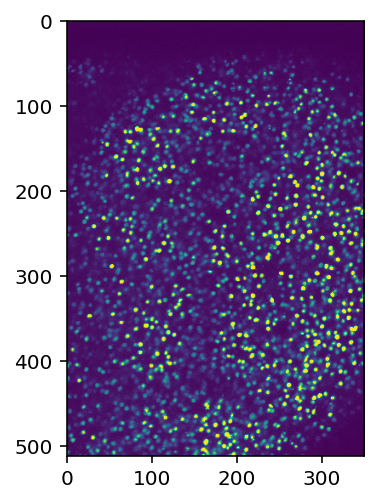

In [30]:
from glob import glob 
import imageio
import cv2

reference_folder ='D://' + user_name +'//'#+ date +'//'+ mouse +'//'+ 'reference' + '//'
image_path=glob(reference_folder + '*.png')[0]
img= imageio.imread(image_path)
img = img[:,x_start:x_end,1]
plt.imshow(img)

Ain = cm.base.rois.extract_binary_masks_from_structural_channel(img, min_area_size = 20, min_hole_size = 0, gSig = 5, expand_method='dilaion')[0]
crd = nb_plot_contour(img, Ain.astype('float32'), img.shape[0], img.shape[1], thr=0.90)

In [31]:
Ain.shape

(179200, 976)

In [14]:
350*512

179200

In [8]:
xTotpix =x_end-x_start #total x pixels
yTotpix = 512 #total y pixels
xycontours = cm.utils.visualization.get_contours(Ain, (yTotpix,xTotpix), thr=0.9, thr_method='max', swap_dim=False)
x = [np.nanmean(cor['coordinates'][:, 0]) for cor in xycontours ]
y = [np.nanmean(cor['coordinates'][:, 1]) for cor in xycontours ]
XYcoords = np.zeros((len(y),2))
XYcoords[:,0] = y
XYcoords[:,1] = np.array(x) + x_start

<font size="5">save and verify the shape </font>

    (the Y coordinates are negative for visualization purposes)

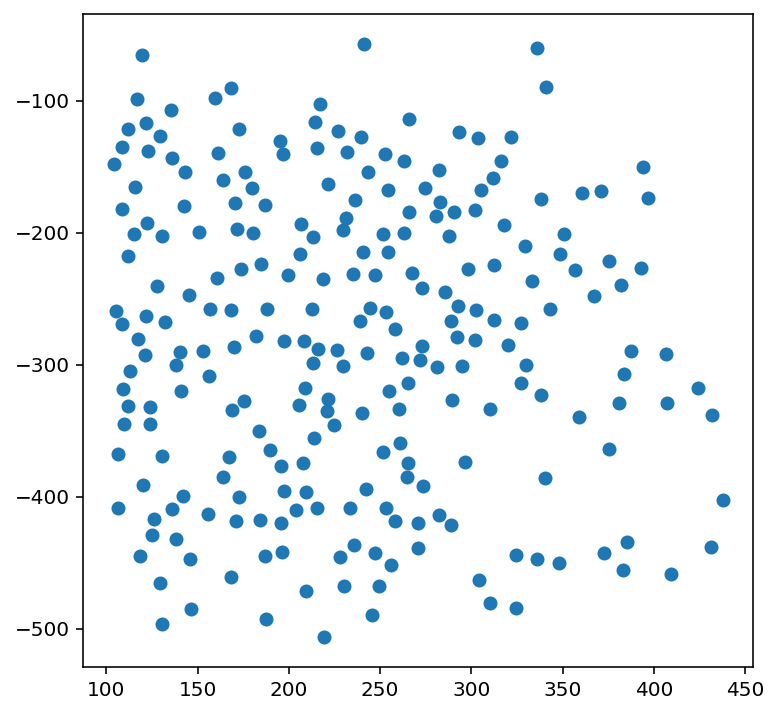

In [9]:
#save and verify the shape 
savemat(out_path +'makeMasks3d_mori.mat', {'sources':XYcoords})
plt.figure(figsize=(6,6))
plt.scatter(XYcoords[:,1],-XYcoords[:,0])

In [14]:
Ain.shape

(204800, 216)